# Speech Emotion Recognition – Preprocessing
## Notebook 2: Label Encoding

**Registration Number:** ITxxxxxxxx  
**Task:** Encode Categorical Emotion Labels into Numeric Format.  
**Objective:** Prepare Target Labels so they can be used by ML Models.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)
print()
print("Labels Sample (First 10):", y[0:10])

Features Shape: (2870, 116)
Labels Shape: (2870,)

Labels Sample (First 10): ['neutral' 'neutral' 'neutral' 'neutral' 'calm' 'calm' 'calm' 'calm'
 'calm' 'calm']


### Step 2: Explore the Emotion Labels
Then we check the unique classes in the dataset and their distribution.

Unique Emotions: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


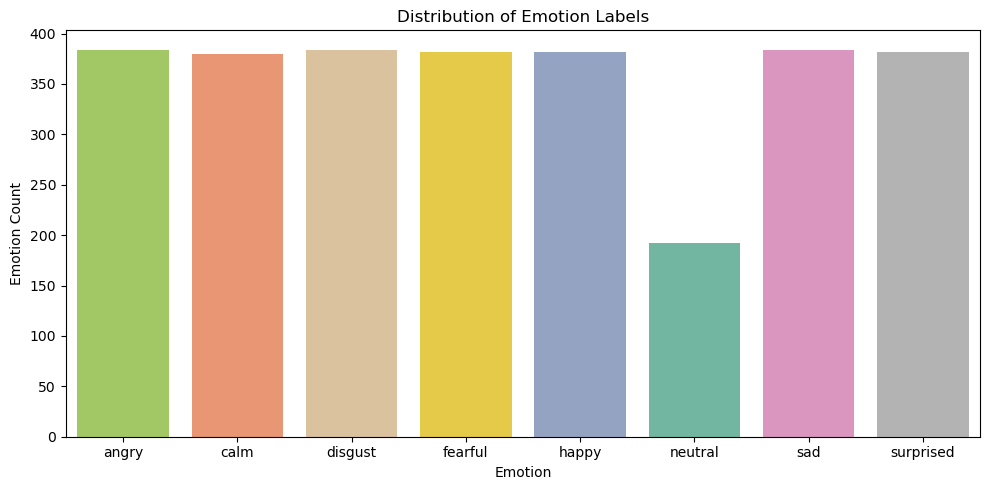

In [52]:
unique_emotions, counts = np.unique(y, return_counts=True)
print("Unique Emotions:", unique_emotions)

plt.figure(figsize=(10,5))
sns.countplot(x=y, hue=y, order=unique_emotions, palette="Set2")
plt.title("Distribution of Emotion Labels")
plt.xlabel("Emotion")
plt.ylabel("Emotion Count")
plt.tight_layout()
plt.show()

### Step 3: Apply Label Encoding
We use `LabelEncoder` to convert text labels into integers.  
E.g. : "angry" as 0

In [46]:
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y)
print("Encoded Labels (First 10):", y_label_encoded[0:10])
print()

y_mapped = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping:", y_mapped)

Encoded Labels (First 10): [5 5 5 5 1 1 1 1 1 1]

Mapping: {'angry': np.int64(0), 'calm': np.int64(1), 'disgust': np.int64(2), 'fearful': np.int64(3), 'happy': np.int64(4), 'neutral': np.int64(5), 'sad': np.int64(6), 'surprised': np.int64(7)}


### Step 4: Apply One-Hot Encoding (For Demonstration)
Some models perform better when classes are represented as binary vectors.

In [47]:
onehot = OneHotEncoder(sparse_output=False)
y_onehot_encoded = onehot.fit_transform(y_encoded.reshape(-1,1))

print("One-Hot Encoded Shape:", y_onehot.shape)
print("Sample (First 10):\n", y_onehot[0:10])

One-Hot Encoded Shape: (2870, 8)
Sample (First 10):
 [[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


### Step 5: Visualization of Encodings

#### Label Encoding

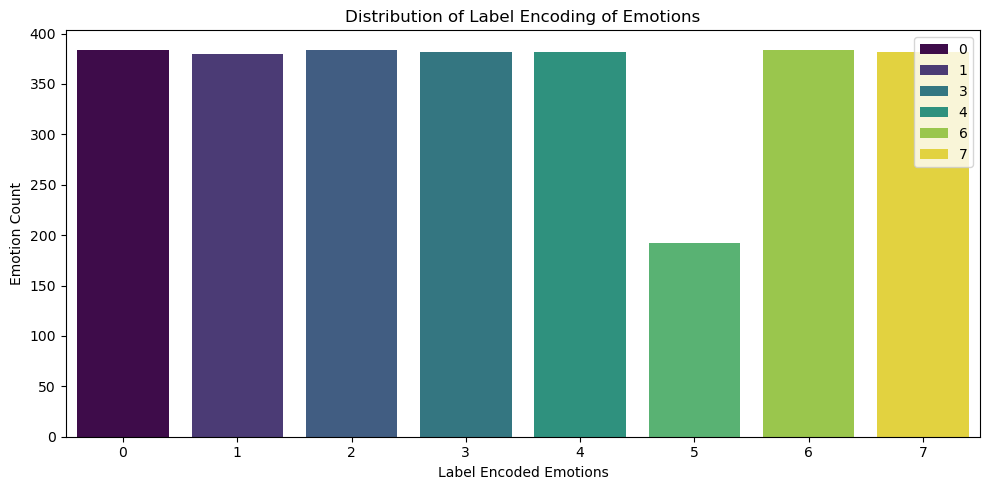

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_label_encoded, hue=y_label_encoded, palette="viridis")
plt.title("Distribution of Label Encoding of Emotions")
plt.xlabel("Label Encoded Emotions")
plt.ylabel("Emotion Count")
plt.tight_layout()
plt.show()

# ✅ Conclusion
- Original labels were strings (happy, sad, angry, etc.).  
- We successfully encoded them into numeric values using **LabelEncoder**.  
- Optionally, we also demonstrated **One-Hot Encoding**.  
- Now the labels are ready for ML model training.